# Implementation of Perceptron
Using simple AND, OR and XOR Logic Gates

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

In [ ]:
class Perceptron:
  def __init__(self,eta,epochs,activationFunction):
    self.weights = np.random.randn(3)*1e-4
    self.eta = eta
    self.epochs = epochs
    self.activationFunction = activationFunction
  def fit(self,X,y):
    self.X = X
    self.y = y
    X_with_bias = np.c_[self.X,-np.ones( (len(self.X),1)  ) ]  #concatenation

    for epoch in range(1,self.epochs+1):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias,self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta* np.dot(X_with_bias.T,error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self,X):
    X_with_bias = np.c_[self.X,-np.ones( (len(self.X),1)  ) ]  #concatenation
    return self.activationFunction(X_with_bias,self.weights)

In [ ]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0 , 1, 0)

```python
# alternatives to the above lamba function
def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  y_hat = np.where(z > 0, 1, 0)
  return y_hat

```

# AND Gate

In [ ]:
data = {"x1":[0, 0, 1, 1],"x2":[0, 1, 0, 1], "y":[0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
X = AND.drop("y",axis=1) # axis = 1  >> dropping across column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [ ]:
model = Perceptron(eta=0.5, epochs=6,activationFunction=activationFunction)

In [ ]:
model.fit(X,y)

for epoch: 1
predicted value: 
[1 0 0 0]
error: 
0   -1
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[ 4.99968569e-01  4.99878984e-01 -2.13410937e-05]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-3.14312646e-05 -1.21016180e-04  1.49997866e+00]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.49996857 0.49987898 0.99997866]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.99996857 0.99987898 0.49997866]
#############

for epoch: 5
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[0.49996857 0.49987898 1.49997866]
#############

for epoch: 6
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[0.99996857 0.9998

# OR Gate

In [ ]:
data = {"x1":[0, 0, 1, 1],"x2":[0, 1, 0, 1], "y":[0,1,1,1]}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
X = OR.drop("y",axis=1) # axis = 1  >> dropping across column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = OR['y']
y.to_frame()

In [ ]:
model = Perceptron(eta=0.5, epochs=5,activationFunction=activationFunction)

In [ ]:
model.fit(X,y)

for epoch: 1
predicted value: 
[0 1 0 1]
error: 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[-7.68798110e-05 -4.99862725e-01  5.00001046e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[4.99923120e-01 1.37275041e-04 1.04590149e-06]
#############

for epoch: 3
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-7.68798110e-05 -4.99862725e-01  1.00000105e+00]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[4.99923120e-01 1.37275041e-04 5.00001046e-01]
#############

for epoch: 5
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[4.99923120e-01 1.37275041e-04 5.00001046e-01]
#############



# XOR Gate

In [ ]:
data = {"x1":[0, 0, 1, 1],"x2":[0, 1, 0, 1], "y":[0,1,1,0]}
XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
X = XOR.drop("y",axis=1) # axis = 1  >> dropping across column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [ ]:
model = Perceptron(eta=0.5, epochs=5,activationFunction=activationFunction)

In [ ]:
model.fit(X,y)

for epoch: 1
predicted value: 
[1 0 1 1]
error: 
0   -1
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99976448e-01 -5.58047442e-06  4.99995298e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 2.35519088e-05  4.99994420e-01 -5.00004702e-01]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99976448e-01 -5.58047442e-06  4.99995298e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 2.35519088e-05  4.99994420e-01 -5.00004702e-01]
#############

for epoch: 5
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-4.99976448e-01 -5.58047442e-06  4.99995298e-01]
#############



# Analysis with the graph

### AND GATE

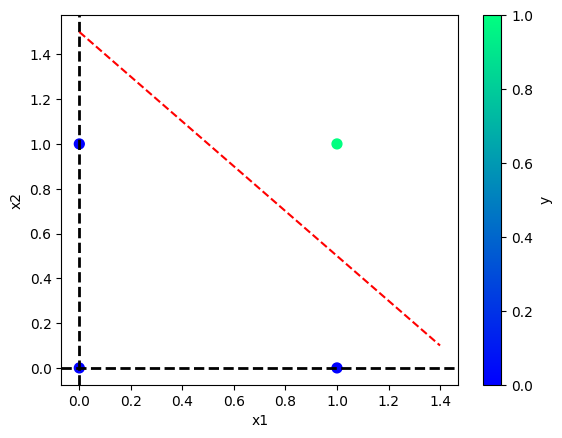

In [ ]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50

plt.plot(x, y, "r--")

### OR

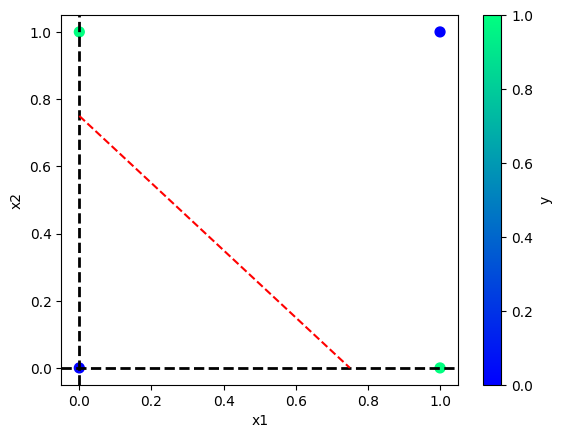

In [ ]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

# XOR

<Axes: xlabel='x1', ylabel='x2'>

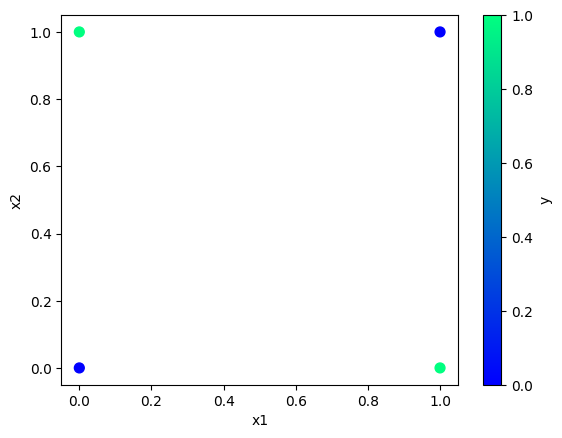

In [ ]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
